## Computing and plotting wind speed (GRIB)

In this notebook we will demonstrate how to:
* extract wind components on the 500 hPa pressure level
* compute the wind speed
* change the GRIB header in the resulting fields
* plot the results

In [1]:
import metview as mv

First, we **retrieve** the wind forecast data from **MARS** for a set of pressure levels and forecast steps on a 5x5 degree **regular latlon grid**. Alternatively we can read these fields from disk.

In [2]:
use_mars = False # if False, then read data from disk

In [3]:
if use_mars: 
    g = mv.retrieve(type='fc', 
                date = -1, 
                time = 12,
                param = ['u','v'], 
                levelist = ['500', '1000'], 
                levType = 'pl',
                step = [0, 6, 12, 18],            
                grid = [5, 5])
else:
    g = mv.read('data_uv.grib')

The result is a [Fieldset](https://confluence.ecmwf.int/display/METV/Fieldset+Functions), which is Metview's own class to represent GRIB data. We can check the contents of our fieldset with the **grib_get()** function, which can extract a set of metadata keys from the GRIB header.

In [4]:
mv.grib_get(g, ['shortName', 'level', 'step'])    

[['u', '500', '0'],
 ['v', '500', '0'],
 ['u', '1000', '0'],
 ['v', '1000', '0'],
 ['u', '500', '6'],
 ['v', '500', '6'],
 ['u', '1000', '6'],
 ['v', '1000', '6'],
 ['u', '500', '12'],
 ['v', '500', '12'],
 ['u', '1000', '12'],
 ['v', '1000', '12'],
 ['u', '500', '18'],
 ['v', '500', '18'],
 ['u', '1000', '18'],
 ['v', '1000', '18']]

Next, we **filter** the 500 hPa wind components using the **read()** function.

In [5]:
u = mv.read(data=g, param='u', levelist='500')
v = mv.read(data=g, param='v', levelist='500')

Having extracted the wind components we **compute** the wind speed fields using Metview's high level fieldset arithmetic. 

In [6]:
sp = mv.sqrt(u*u + v*v)

We can see that in the results the **paramId** and the corresponding **shortName** still refer to the u wind component.

In [7]:
mv.grib_get(sp, ['shortName', 'paramId','level', 'step'])

[['u', '131', '500', '0'],
 ['u', '131', '500', '6'],
 ['u', '131', '500', '12'],
 ['u', '131', '500', '18']]

The reason for this is that Metview always copies the metadata of the first field in the expression into the resulting field. When we plot fields, the automatic contouring and title are based on the **paramId**. So it is generally a good idea to set it correctly. We will do it by using the **grib_set_long()** function (changing the paramId will set the shortName automatically).

In [8]:
sp = mv.grib_set_long(sp, ['paramId', 10])
mv.grib_get(sp, ['shortName', 'paramId','level', 'step'])

[['ws', '10', '500', '0'],
 ['ws', '10', '500', '6'],
 ['ws', '10', '500', '12'],
 ['ws', '10', '500', '18']]

Finally, we **plot** the first windspeed field using automatic contouring and title settings.

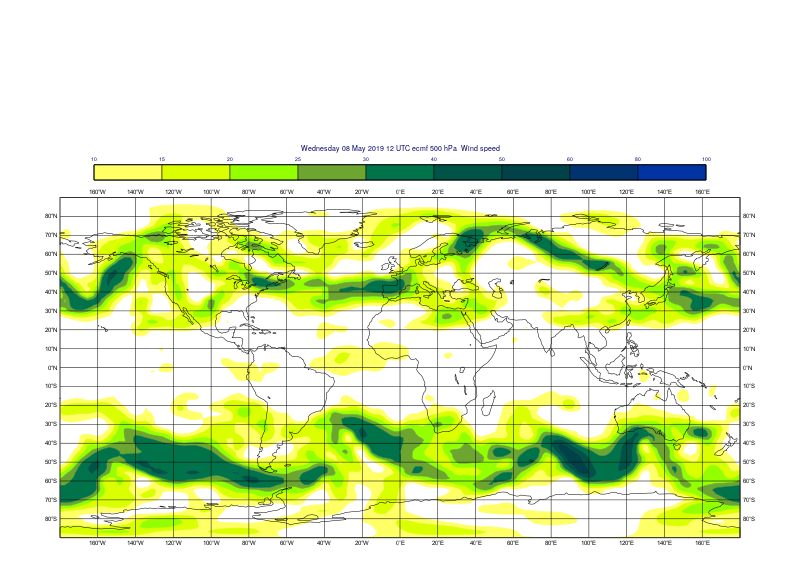

In [9]:
mv.setoutput('jupyter')
mv.plot(sp, mv.mcont(contour_automatic_setting='ecmwf', legend='on'))

# Additional resources

- [Introductory Metview training course](https://confluence.ecmwf.int/display/METV/Data+analysis+and+visualisation+using+Metview)
- [Metview's Python interface](https://confluence.ecmwf.int/display/METV/Metview%27s+Python+Interface)
- [Function list](https://confluence.ecmwf.int/display/METV/List+of+Operators+and+Functions)